# Interpretation 1: Hello, MultKAN!

Motivation: The original KAN has some level of interpretability, but sometimes not fully interpretable (fully interpretable = convert the network to a symbolic formula). The biggest limitation is the lack of multiplications operators. The original KAN only has addition operators. Although multiplication can be expressed as addition and single-variable functions (which is the core idea of Kolmogorov-Arnold representation theorem), we still hope to explicitly have multiplications in the KANs so that multiplications can be more easily read out from KANs. 

We first show how multiplications can be represented by addition and single variable functions. Usually KAN would find solutions leveraging linear functions and quadractic functions (the solutions are not unique). $$xy=((x+y)^2-(x-y)^2)/4=((x+y)^2-x^2-y^2)/2=\cdots$$

In [1]:
from kan import *
torch.set_default_dtype(torch.float64)

model = KAN(width=[2,5,1])

f = lambda x: x[:,0] * x[:,1]
dataset = create_dataset(f, n_var=2)
model.fit(dataset, steps=20, lamb=0.01);

train loss: 4.38e-02 | test loss: 4.59e-02 | reg: 5.74e+00 :  15%|▍  | 3/20 [00:02<00:13,  1.30it/s]


KeyboardInterrupt: 

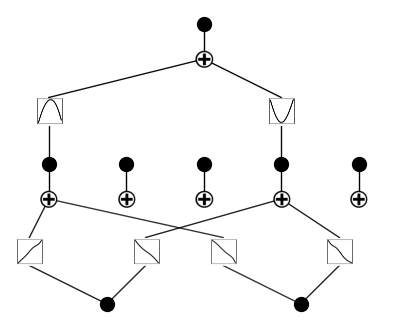

In [13]:
model.plot()

This network seems to be using the equality $xy=((x+y)^2-(x-y)^2)/4$ but not exactly.

Now we want to explicitly introduce multiplication operators, called MultKAN. Note that MultKAN and KAN are actually the same class in implementation, so you can use either class name. If you dig into MultKAN.py, there is a line 'KAN = MultKAN'. KAN is just a special case of MultKAN. To inlcude multiplications, you only need to modify the width parameter. For example, [2,5,1] KAN means 2 inputs, 5 hidden add neurons, and 1 output; [2,[5,2],1] MultKAN means 2 inputs, 5 hidden add neurons and 2 hidden mult neurons, and 1 output.

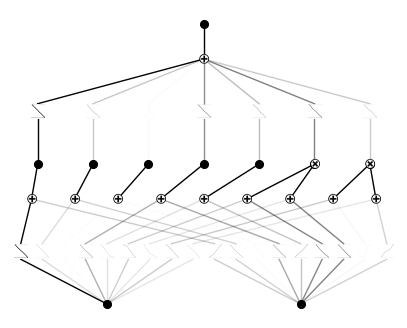

In [3]:
model = KAN(width=[2,[5,2],1], base_fun='identity', auto_save=True)
model.get_act(dataset)
model.plot()

In [4]:
model.fit(dataset, steps=20, lamb=0.01, lamb_coef=1.0);

train loss: 1.41e-02 | test loss: 1.44e-02 | reg: 5.34e+00 : 100%|██| 20/20 [00:17<00:00,  1.17it/s]


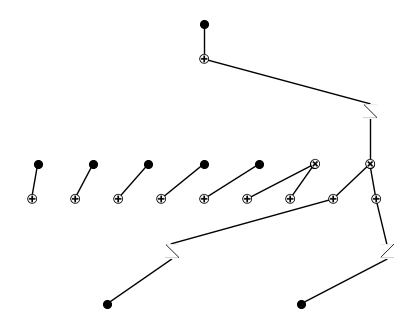

In [5]:
model.plot()

In [6]:
model = model.prune()

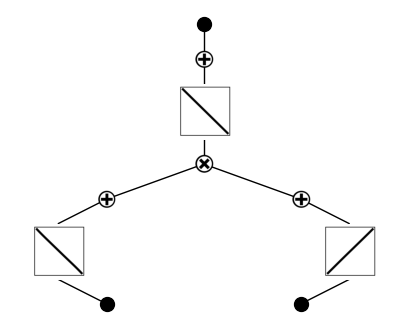

In [7]:
model.plot()

In [8]:
model.fit(dataset, steps=20);

train loss: 1.28e-08 | test loss: 1.31e-08 | reg: 5.26e+00 : 100%|██| 20/20 [00:04<00:00,  4.40it/s]


In [9]:
model.auto_symbolic()

fixing (0,0,0) with x, r2=0.9999999999860647, c=1
fixing (0,0,1) with 0
fixing (0,1,0) with 0
fixing (0,1,1) with x, r2=0.9999999999802792, c=1
fixing (1,0,0) with x, r2=0.9999999997392498, c=1


In [10]:
model.fit(dataset, steps=20);

train loss: 1.49e-16 | test loss: 1.52e-16 | reg: 5.26e+00 : 100%|██| 20/20 [00:00<00:00, 28.72it/s]


In [11]:
sf = model.symbolic_formula()[0][0]
nsimplify(ex_round(ex_round(sf, 3),3))

x_1*x_2